In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
costs = pd.read_csv('../datasets/cost.csv')

In [16]:
costs.shape

(14655, 9)

## Stores with the highest costs

### The 'rent_incentive_r12m' column was excluded from the total costs as it always is a negative entry.

In [21]:
costs.head()

,store_id,rent_incentive_r12m,service_charges_r12m,marketing_costs_r12m,administration_fees_r12m,real_estate_taxes_r12m,large_scale_works_r12m,maintenance_works_r12m,total_costs
0,0.0,-44479.0,46663.0,8273.0,5672.0,67519.0,13777.0,5591.0,147495.0
1,55.0,-37692.0,22365.0,8407.0,13249.0,30528.0,715.0,3789.0,79053.0
2,259.0,-75975.0,76921.0,9732.0,4661.0,48639.0,12409.0,17192.0,169554.0
3,226.0,-74867.0,35722.0,8937.0,1323.0,24502.0,6631.0,33046.0,110161.0
4,104.0,-57134.0,30775.0,1247.0,4119.0,8557.0,11283.0,48185.0,104166.0


In [20]:
costs.columns

Index(['store_id', 'rent_incentive_r12m', 'service_charges_r12m',
       'marketing_costs_r12m', 'administration_fees_r12m',
       'real_estate_taxes_r12m', 'large_scale_works_r12m',
       'maintenance_works_r12m', 'total_costs'],
      dtype='object')

In [6]:
costs['total_costs'] = (costs['service_charges_r12m'] + costs['marketing_costs_r12m'] + costs['administration_fees_r12m']
                        + costs['real_estate_taxes_r12m'] +costs['large_scale_works_r12m'] + costs['maintenance_works_r12m'])

In [7]:
costs.sort_values(by='total_costs', ascending=False)

,store_id,rent_incentive_r12m,service_charges_r12m,marketing_costs_r12m,administration_fees_r12m,real_estate_taxes_r12m,large_scale_works_r12m,maintenance_works_r12m,total_costs
3701,4958.0,-21790.0,91688.0,12432.0,15597.0,75359.0,9881.0,122551.0,327508.0
13854,14885.0,-99548.0,101159.0,8423.0,13926.0,85161.0,3474.0,115311.0,327454.0
2634,3841.0,-69356.0,99781.0,8426.0,10845.0,75239.0,14369.0,118779.0,327439.0
11494,12434.0,-79913.0,101041.0,10770.0,8353.0,82760.0,13126.0,111019.0,327069.0
10821,11665.0,-48365.0,100059.0,4214.0,9084.0,75600.0,15667.0,121702.0,326326.0
...,...,...,...,...,...,...,...,...,...
13394,14394.0,-94386.0,7934.0,2694.0,2748.0,3935.0,7520.0,10661.0,35492.0
7769,2242.0,-6253.0,946.0,1301.0,6021.0,16684.0,8235.0,1504.0,34691.0
8780,10588.0,-60596.0,5057.0,976.0,5202.0,15134.0,718.0,1908.0,28995.0
4211,5538.0,-4576.0,3332.0,5145.0,6228.0,1898.0,9026.0,2403.0,28032.0


<Axes: >

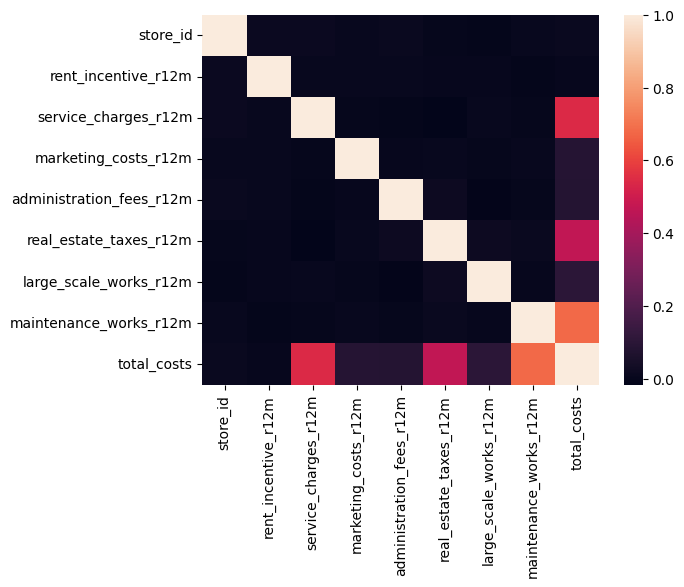

In [8]:
sns.heatmap(costs.corr())

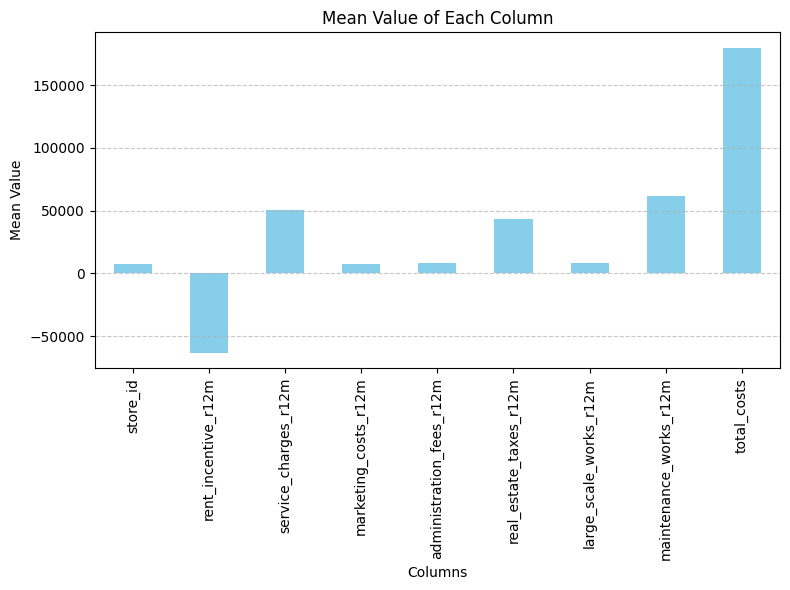

In [15]:
# Calculate the mean of each column
column_means = costs.mean()


# Plot the mean values
plt.figure(figsize=(8, 6))
column_means.plot(kind='bar', color='skyblue')
plt.title('Mean Value of Each Column')
plt.xlabel('Columns')
plt.ylabel('Mean Value')

# Set the x-axis labels vertically
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

In [15]:
data_catalogue = pd.read_excel('datacatalogueHEC.xlsx')

In [18]:
data_catalogue.head(11)

,Column Name,Data Type,Data Range,Example Value,Description
0,store_name,string,Free Text,"""Zara""",Store commercial name
1,store_id,int,[0-999999999],"""111""",Unique store identifier
2,mall_id,int,[0-999999999],"""543""",Unique mall identifier
3,store_year_opened,datetime,01/01/1970 - Now,07/05/2021\t,Store opening date
4,store_year_closed,datetime,01/01/1970 - Now,11/02/2021\t,Store closing date
5,store_branch_level_1,string,Free Text,"""Services""",Primary business category
6,store_branch_level_2,string,Free Text,"""Sweet moments""",Secondary business category
7,store_branch_level_3,string,Free Text,"""Monobrand mainstream""",Tertiary business category
8,store_sales_r12m,float,[0-999999999.0],"""450699""",Rolling 12 months sales
9,store_rent_r12m,float,[0-999999999.0],"""546236""",Rolling 12 months rent


In [17]:
dwell_time = pd.read_csv('../datasets_v2/dwell_time_v1.csv')

In [18]:
dwell_time.head()

,external_mall_id,block_id,average_dwell_time,median_dwell_time
0,18,11273,249.520051,180.0
1,18,11271,190.005359,120.0
2,17,4319,1325.216860,780.0
3,36,1201,621.422549,240.0
4,36,1212,217.833860,120.0


In [19]:
dwell_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   external_mall_id    3581 non-null   int64  
 1   block_id            3581 non-null   int64  
 2   average_dwell_time  3581 non-null   float64
 3   median_dwell_time   3581 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 112.0 KB
